# Analysis of COVID-19 data
With help from Carmen and her associates!

In [8]:
from pathlib import Path
from process_covid import (load_covid_data,
                           cases_per_population_by_age,
                           hospital_vs_confirmed,
                           create_confirmed_plot,
                           count_high_rain_low_tests_days)

The data for each area is held in a specific file. Start by loading it in.

In [38]:
data_directory = Path("covid_data")
data_file = "test.json"
data_er = load_covid_data(data_directory / data_file)

NotImplementedError: The file is not json format

In [35]:
data_er

{'region': {'name': 'United States of America-California-San Francisco',
  'key': 'US_CA_SFO',
  'latitude': 37.7775,
  'longitude': -122.416389,
  'elevation': 52,
  'area': {'total': 600, 'rural': None, 'urban': None},
  'population': {'total': 881549,
   'male': 421640,
   'female': 414388,
   'age': [61427, 57439, 153489, 159776, 106675, 102079, 93893, 63033, 38217],
   'rural': None,
   'urban': None},
  'open_street_maps': 111968,
  'noaa_station': 99847999999.0,
  'noaa_distance': 3.070242},
 'evolution': {'2020-08-15': {'hospitalizations': {'hospitalized': {'new': {'all': None,
      'male': None,
      'female': None,
      'age': []},
     'total': {'all': None, 'male': None, 'female': None, 'age': []},
     'current': {'all': 16, 'male': None, 'female': None, 'age': []}},
    'intensive_care': {'new': {'all': None,
      'male': None,
      'female': None,
      'age': []},
     'total': {'all': None, 'male': None, 'female': None, 'age': []},
     'current': {'all': 2, 'male

And now I can use this variable to do my different analyses.

First, I want to see how the number of cases has changed across time, but separated into age groups. This will help me find age-dependent patterns in the spread of the virus.

In [22]:
cases_population = cases_per_population_by_age(data_er)
cases_population.get('0-24', "No data in that bin")

[('2020-03-16', 111.53775390770267),
 ('2020-03-17', 111.5886430984471),
 ('2020-03-18', 111.59842948128257),
 ('2020-03-19', 111.65636486766853),
 ('2020-03-20', 111.67946073116023),
 ('2020-03-21', 111.70059931808484),
 ('2020-03-22', 111.71038570092031),
 ('2020-03-23', 111.72330372626313),
 ('2020-03-24', 111.75383724070979),
 ('2020-03-25', 111.78280493390277),
 ('2020-03-26', 111.79063404017114),
 ('2020-03-27', 111.83056248213985),
 ('2020-03-28', 111.83721722246797),
 ('2020-03-29', 111.84935233718394),
 ('2020-03-30', 111.89554406416735),
 ('2020-03-31', 112.06856731269842),
 ('2020-04-01', 112.1938330129924),
 ('2020-04-02', 112.47176628551968),
 ('2020-04-03', 112.57511048826221),
 ('2020-04-04', 112.58489687109768),
 ('2020-04-05', 112.58841996891844),
 ('2020-04-06', 112.62795695557374),
 ('2020-04-07', 112.6522271850057),
 ('2020-04-08', 112.68197778882552),
 ('2020-04-09', 112.76026885150925),
 ('2020-04-10', 112.7739697874789),
 ('2020-04-11', 112.7947169190901),
 ('202

I am also interested in how many cases end up in hospital. Specifically, I want to look at the ratio
$$\frac{\textrm{people hospitalised}}{\textrm{confirmed cases}}$$
and how it changes over time.

I haven't decided what exactly I'll do with it yet, so for now I only want to get two lists: one with the dates on which the ratio is computed, and another with its corrsponding values.

In [23]:
hosp_conf_dates, hosp_conf_ratio = hospital_vs_confirmed(data_er)
for date, ratio in zip(hosp_conf_dates[:5], hosp_conf_ratio[:5]):
    print(f" {date}: {ratio:.2f}")

 2020-03-16: 0.50
 2020-03-17: 0.20
 2020-03-18: 0.25
 2020-03-19: 0.14
 2020-03-20: 0.50


Plots will be crucial for getting the information across efficiently. Carmen says that this one function is flexible enough to process the data in different ways. One thing I want to see is the evolution of confirmed cases grouped by the patient's sex. This command should plot two lines, one each for male and female:

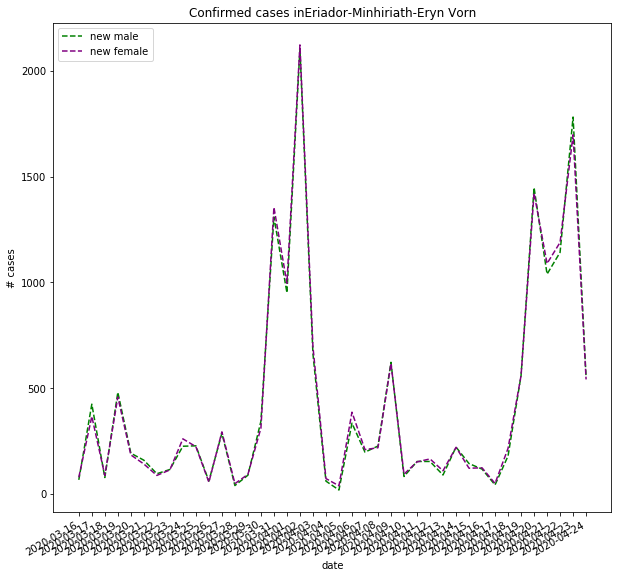

In [24]:
create_confirmed_plot(data_er, sex=True,status='new')

However, I also want to break it down by age instead of sex. In particular, I want to see the cases involving people
- up to age 15 (or the age bin they belong to);
- up to age 37;
- and up to age 99

all in the same plot.

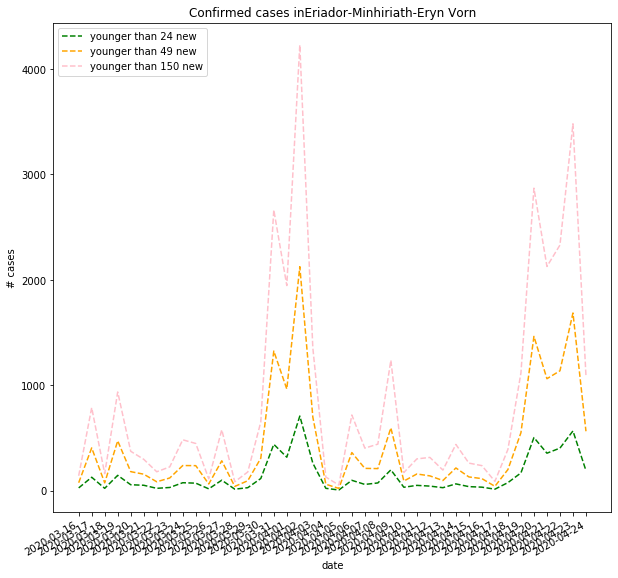

In [25]:
create_confirmed_plot(data_er, max_ages=[15, 37, 99],status='new')

Finally, I want to see if the weather affects how likely people are to get tested. To simplify, I'll consider a day to be "rainy" if it rained more than the previous day. Out of those rainy days, on how many were there fewer tests carried out than the previous day? Because the data will be noisy, I first want to smooth the data by replacing each value with the average of the values in a 7-day window around it. Then I will use the smoothened values for this calculation instead of the originals.

Carmen says that this one line should do all that:

In [7]:
ratio = count_high_rain_low_tests_days(data_er)
print(f"A {ratio * 100:6.2f}% of rainy days affected the number of tests")

A  25.00% of rainy days affected the number of tests


Let's see what works!